# Prediction of Singapore HDB Resale Price based on Governmental Data
<hr>
Thomas ten Hacken, Maxime Kayser and Mei-Jun Yeh <br>
CE9010 Introduction to Data Science <br>
Singapore, April 2018
<hr>
## Introduction

Predicting housing prices is an extensive researched topic in economics and data science. Previously conducted studies by [4,5,6,8] showed that a neural network is better performing to predict future value than a multiple regression model. This is especially the case for a "true" open market [4]. This is contradicted by [7], who argue that results from neural networks vary widely, while traditional regression models are more consistent. Besides predicting prices based on features, novel prediction models have been developed. For example, a price prediction model that looks at the $#$ of searches on Google [9]. Although the researchers found that searches and housing prices are correlated, it is difficult to predict the housing price of a specific building and its characteristics.

Studies conducted often work with an extensive list of variables, including features of the house, but also from the environment and the amenities. For example, [10] use variables such as size (in square meters) and age, but also the presence of a garage or swimming pool. 

### Characteristics of the HDB Property Market
In Singapore, a distinction can be made between two types of properties: a private residential market and a market that is managed by the Housing and Development Board (HDB), which is part of the Ministry of National Development [2]. The flats developed in the HDB market are heavily subsidized by the Singaporean government, and are affordable alternatives for Singaporean residents.

The market for HDB properties differs from the private residential market in several ways. Firstly, the properties are leased to the residents. This lease period is typically 99 years. After the period, the property ownership rights are again in the hands of HDB. Thus, the owner of an HDB apartment is simply leasing it for an extensive amount of time. This differs from renting, since in that case the tenant needs to pay monthly based on actual market conditions [3]. Besides the lease, the owner can be eligible to rent out or sell the flat during the lease period. This created a new market, bla bla...

A previous study conducted in the private residential market [11] shows variables being used in their predictive model. This includes dummy variables for a total of 15 facilities, ranging from swimming pool to security and gyms. The study also took into account unit characteristics, such as size, age and floor level. HDB flats do not have additional facilities, but have similar unit characteristics. The model also takes into account the distance to strategic positions, such as MRT stations and schools.


### Research Objective

Since the market is monitored by the Singaporean government, it can be considered as not truly open. Therefore, based on previous research, a regression model might be sufficient. This research aims to validate if a regression model is sufficient for predicting housing prices in the HDB resale market. The HDB resale data from the Singaporean government, spanning from 1990 until January 2018, is used to develop the model.

After merging the data, we explore the data, then clean and preprocess the data and finally train the data to predict the test data. 

## Libraries
<hr>
The libraries used are pandas, numpy, seaborn, Counter, matplotlib, axes3d, linearregression.

In [1]:
#data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import sklearn
from collections import Counter
from sklearn import datasets, linear_model, cross_validation
from sklearn.metrics import mean_squared_error, r2_score
import geocoder

#visualization
%matplotlib inline 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from IPython.display import IFrame

#machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

/Users/meijunyeh/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 1 Data Acquisition
<hr>
The data for this report is acquired from the Singapore government website [1]. Data are collected from the period 1990 until January 2018. The data is provided in four seperate files, which will be merged into Python. The third file (> 20 MB) was seperated into periods of 2006-2012 and 2012-2014. This was necessary to make use of the Github repository.

In [2]:
#load dataset
data1 = pd.read_csv('sg-resale-flat-prices-1990-1999.csv', sep =',')
print('Number of training data =', data1.shape)

data2 = pd.read_csv('sg-resale-flat-prices-2000-2005.csv', sep =',')
print('Number of training data =', data2.shape)

data3 = pd.read_csv('sg-resale-flat-prices-2006-2012.csv', sep =',')
print('Number of training data =', data3.shape)

data4 = pd.read_csv('sg-resale-flat-prices-2012-2014.csv', sep =',')
print('Number of training data =', data4.shape)

data5 = pd.read_csv('sg-resale-flat-prices-2014-2018.csv', sep =',')
print('Number of training data =', data5.shape)

Number of training data = (288144, 10)
Number of training data = (197175, 10)
Number of training data = (172476, 10)
Number of training data = (52203, 10)
Number of training data = (58631, 11)


Following the shape of the data, there is a noticable difference from the last dataset. To discover which variable has been added to the dataset, we recall the first two features from both the first and the last dataset. 

In [84]:
#show features of data set 1
data1.head(5)

month        town flat_type block       street_name storey_range  \
0  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4  1990-01  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  
0            31.0        IMPROVED                 1977          9000  
1            31.0        IMPROVED                 1977          6000  
2            31.0        IMPROVED                 1977          8000  
3            31.0        IMPROVED                 1977          6000  
4            73.0  NEW GENERATION                 1976         47200

In [101]:
#show features of data set 5
data5.tail(5)

month    town  flat_type block     street_name storey_range  \
58626  2018-01  YISHUN     5 ROOM   760    YISHUN ST 72     07 TO 09   
58627  2018-01  YISHUN     5 ROOM   876    YISHUN ST 81     04 TO 06   
58628  2018-01  YISHUN  EXECUTIVE   792  YISHUN RING RD     07 TO 09   
58629  2018-01  YISHUN  EXECUTIVE   387  YISHUN RING RD     04 TO 06   
58630  2018-01  YISHUN  EXECUTIVE   277    YISHUN ST 22     07 TO 09   

       floor_area_sqm  flat_model  lease_commence_date  remaining_lease  \
58626           122.0    Improved                 1987               68   
58627           121.0    Improved                 1987               69   
58628           146.0  Maisonette                 1987               68   
58629           146.0  Maisonette                 1988               69   
58630           146.0  Maisonette                 1985               66   

       resale_price  
58626      490000.0  
58627      468000.0  
58628      555000.0  
58629      550000.0  
58630      545000.0

By comparing the two data sets, we can see that the extra feature is the remaining lease year of the HBD housing. In Singapore, the lease of the HBD housing starts with 99 years. In the 99 years, the appartment can be resold to someone else, but this does not mean that 99 years will be refreshed. The number of years the previous owner has lived in the appartment will be substracted instead. After the remaining lease year, the current owner will have to move [source]. We believe this is an important feature to consider in the predictive model. Therefore, we will recalculate the row for the other data sets as well during the preprocessing stage. <br>

However, before the preprocessing stage, exploration will be done to figure out other possible changes. To continue with the exploration, the data should be merged. To merge the data, the datasets should consist of the same number of features. Therefore, the remaining lease variable will be removed first.

In [3]:
data5 = data5.drop('remaining_lease',1)
print('Number of training data =', data5.shape)

Number of training data = (58631, 10)


In [75]:
data5.head()

month        town flat_type block        street_name storey_range  \
0  2015-01  ANG MO KIO    3 ROOM   174   ANG MO KIO AVE 4     07 TO 09   
1  2015-01  ANG MO KIO    3 ROOM   541  ANG MO KIO AVE 10     01 TO 03   
2  2015-01  ANG MO KIO    3 ROOM   163   ANG MO KIO AVE 4     01 TO 03   
3  2015-01  ANG MO KIO    3 ROOM   446  ANG MO KIO AVE 10     01 TO 03   
4  2015-01  ANG MO KIO    3 ROOM   557  ANG MO KIO AVE 10     07 TO 09   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  
0            60.0        Improved                 1986      255000.0  
1            68.0  New Generation                 1981      275000.0  
2            69.0  New Generation                 1980      285000.0  
3            68.0  New Generation                 1979      290000.0  
4            68.0  New Generation                 1980      290000.0

(Exploration - Check Storey Range) Since the storey range is ranging differently at a certain point. We are checking in which dataset(s) this is happening.

In [6]:
print(np.unique(data1['storey_range']))
print(np.unique(data2['storey_range']))
print(np.unique(data3['storey_range']))
print(np.unique(data4['storey_range']))
print(np.unique(data5['storey_range']))

['01 TO 03' '04 TO 06' '07 TO 09' '10 TO 12' '13 TO 15' '16 TO 18'
 '19 TO 21' '22 TO 24' '25 TO 27']
['01 TO 03' '04 TO 06' '07 TO 09' '10 TO 12' '13 TO 15' '16 TO 18'
 '19 TO 21' '22 TO 24' '25 TO 27' '28 TO 30']
['01 TO 03' '04 TO 06' '07 TO 09' '10 TO 12' '13 TO 15' '16 TO 18'
 '19 TO 21' '22 TO 24' '25 TO 27' '28 TO 30' '31 TO 33' '34 TO 36'
 '37 TO 39' '40 TO 42']
['01 TO 03' '01 TO 05' '04 TO 06' '06 TO 10' '07 TO 09' '10 TO 12'
 '11 TO 15' '13 TO 15' '16 TO 18' '16 TO 20' '19 TO 21' '21 TO 25'
 '22 TO 24' '25 TO 27' '26 TO 30' '28 TO 30' '31 TO 33' '31 TO 35'
 '34 TO 36' '36 TO 40' '37 TO 39' '40 TO 42']
['01 TO 03' '04 TO 06' '07 TO 09' '10 TO 12' '13 TO 15' '16 TO 18'
 '19 TO 21' '22 TO 24' '25 TO 27' '28 TO 30' '31 TO 33' '34 TO 36'
 '37 TO 39' '40 TO 42' '43 TO 45' '46 TO 48' '49 TO 51']


### 1.1 Merge Datasets
Since the data are divided into five datasets, we want to merge the data for further exploration. To do this, the concatenation is used from pandas.

In [4]:
#concatenate dataset
sets = [data1, data2, data3, data4, data5]
data = pd.concat(sets)
print('Number of training data =', data.shape)

Number of training data = (768629, 10)


## 2 Exploration of the Dataset
<hr>
To start exploring the data, the dataset are loaded. From the dataset, we can conclude the data contain 768.629 datapoints and 10 features. <br>

https://towardsdatascience.com/5-quick-and-easy-data-visualizations-in-python-with-code-a2284bae952f

### 2.1 Data description

In [6]:
#load dataset
print('Number of training data =', data.shape[0])
print('Number of features =', data.shape[1])

Number of training data = 768629
Number of features = 10


We use data.describe() to have a look at some key metrics of the data set.

In [78]:
print(data.describe())

       floor_area_sqm  lease_commence_date  resale_price
count   768629.000000        768629.000000  7.686290e+05
mean        95.455564          1986.563476  2.823196e+05
std         26.210450             8.851260  1.424499e+05
min         28.000000          1966.000000  5.000000e+03
25%         72.000000          1980.000000  1.750000e+05
50%         93.000000          1985.000000  2.650000e+05
75%        114.000000          1993.000000  3.700000e+05
max        307.000000          2015.000000  1.180000e+06


We can conclude:
- All appartments vary between the size of 28 and 307 sqm. The mean is 95.46 sqm.
- The oldest lease start date is 1966 and the oldest one is 2015. Thus no appartment in this list has a lease that expires before 2065. The mean lease start date is 1987. 
- Resale prices vary between 5000 SGD and 1.18 million SGD. It has to be verified if a price of 5000SGD is possible or is due to faulty data. The median price lies at 282k SGD.
- Overall, at a first glance the dataset seems to be clean and free of faulty datapoints. <br>

In the subsequent section, the data types are retrieved from the dataset.

In [79]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768629 entries, 0 to 58630
Data columns (total 10 columns):
month                  768629 non-null object
town                   768629 non-null object
flat_type              768629 non-null object
block                  768629 non-null object
street_name            768629 non-null object
storey_range           768629 non-null object
floor_area_sqm         768629 non-null float64
flat_model             768629 non-null object
lease_commence_date    768629 non-null int64
resale_price           768629 non-null float64
dtypes: float64(2), int64(1), object(7)
memory usage: 64.5+ MB
None


We can see that the data list is complete, as all features have 768.629 values.

After loading the data, the data are explored. Features are checked to see whether cleaning and preprocessing of the data is needed.

### 2.2 Univariate Plots

#### 2.2.1 Sales Trend

Total Sales Year Count: 29


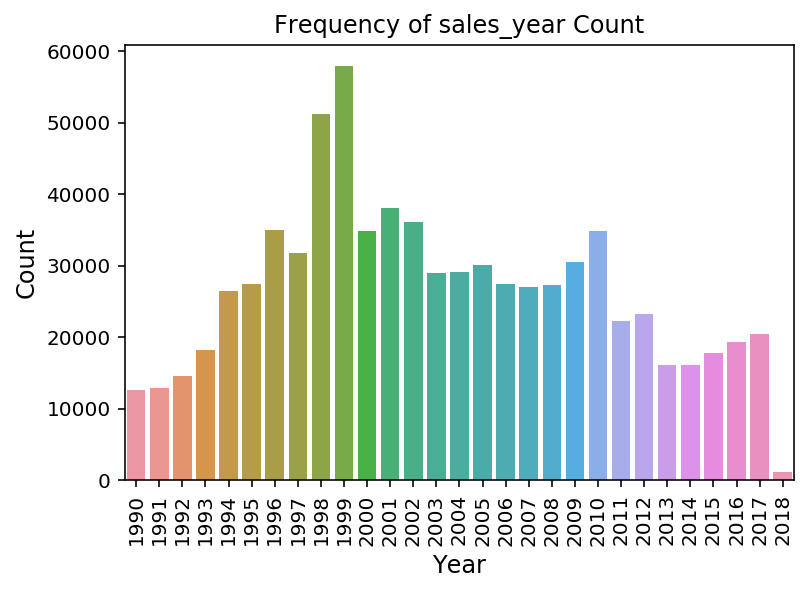

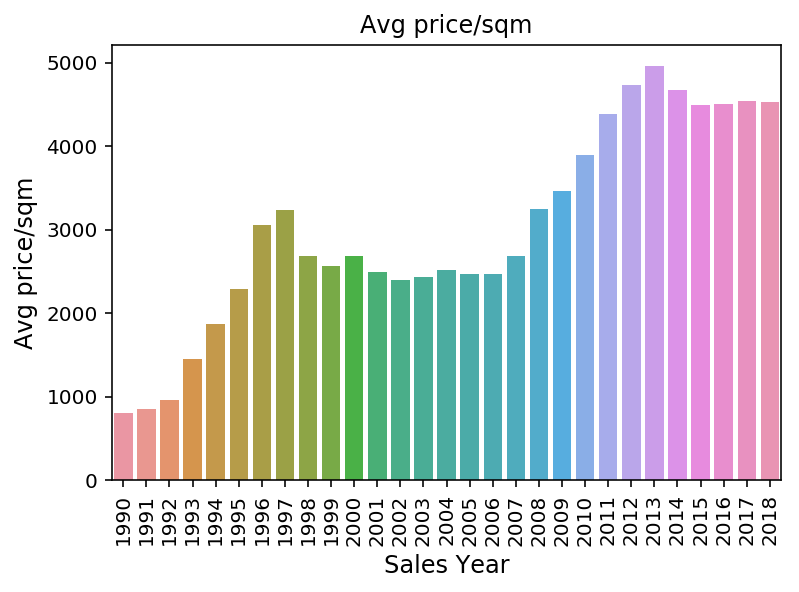

In [39]:
#yearly sales trend
count_sales_year = (pd.DatetimeIndex(data['month']).year).nunique()
print("Total Sales Year Count:", count_sales_year)
#sales_year_count = (pd.DatetimeIndex(data['month']).year).value_counts()
#print("Sales Year Count \n" +str(sales_year_count))

sales_year = np.unique(pd.DatetimeIndex(data['month']).year.values)
year_count=pd.DatetimeIndex(data['month']).year.value_counts()

sns.barplot(year_count.index, year_count.values, order=sales_year)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of sales_year Count", fontsize=12)
plt.show()

#sales year vs avg price/sqm
n = len(sales_year)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][pd.DatetimeIndex(data['month']).year == sales_year[i]].sum()
        sqmm = data['floor_area_sqm'][pd.DatetimeIndex(data['month']).year == sales_year[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
sns.barplot(sales_year,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Sales Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Observations:
- Counts of Sales per year increase from 1990 to 1999 and decrease thereafter.
- As expected, in general, prices per sqm increase over time.
- However there was a dip after 1997 and after 2013.

Total Sales Month Count: 12


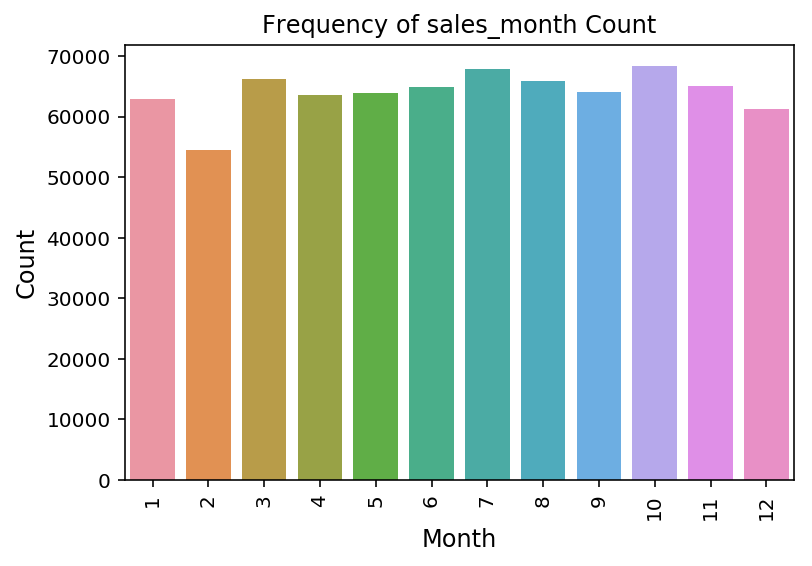

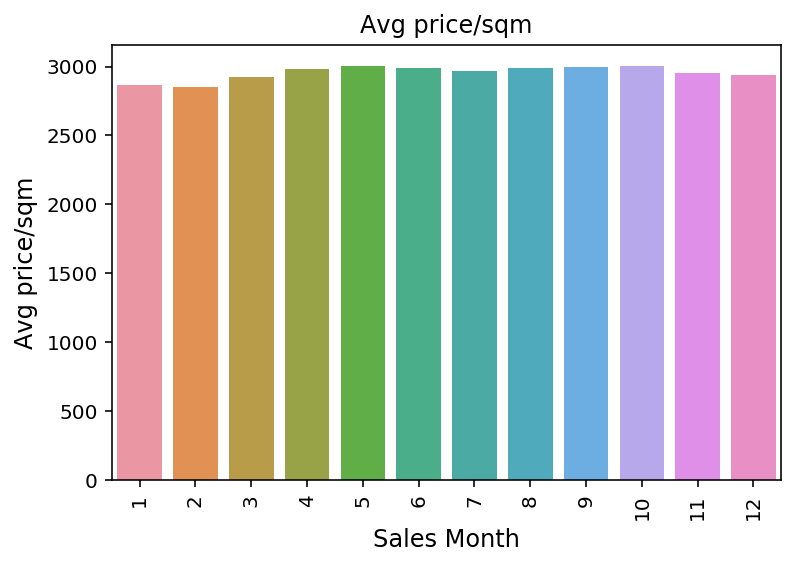

In [40]:
#monthly sales trend
count_sales_month = (pd.DatetimeIndex(data['month']).month).nunique()
print("Total Sales Month Count:", count_sales_month)
#sales_month_count = (pd.DatetimeIndex(data['month']).month).value_counts()
#print("Sales Month Count \n" +str(sales_month_count))

sales_month = np.unique(pd.DatetimeIndex(data['month']).month.values)
month_count=pd.DatetimeIndex(data['month']).month.value_counts()

sns.barplot(month_count.index, month_count.values, order=sales_month)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of sales_month Count", fontsize=12)
plt.show()

#sales month vs avg price/sqm
n = len(sales_month)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][pd.DatetimeIndex(data['month']).month == sales_month[i]].sum()
        sqmm = data['floor_area_sqm'][pd.DatetimeIndex(data['month']).month == sales_month[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
sns.barplot(sales_month,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Sales Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Observations:
- It seems like the last and first month of a year have slightly lower prices than the middle months. <br>

#### 2.2.2 Feature: Lease Commencement Year

Total Lease Commence Count: 50


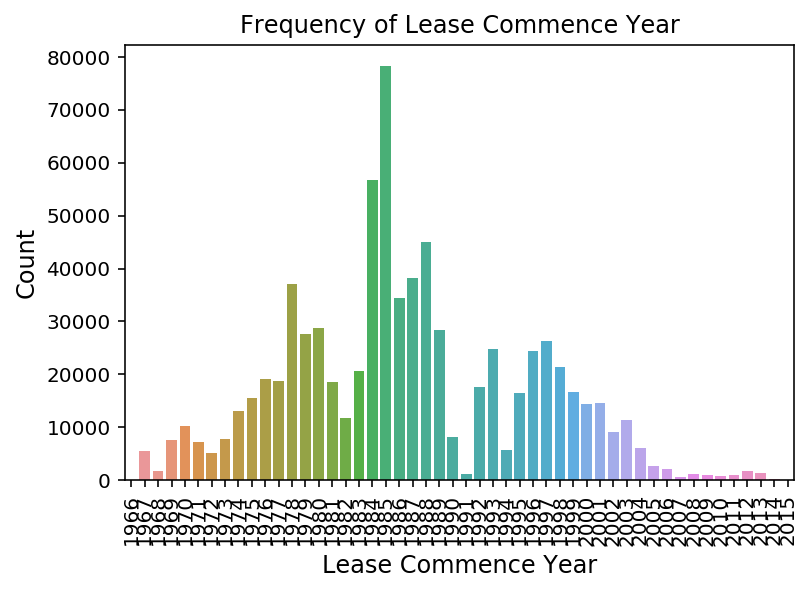

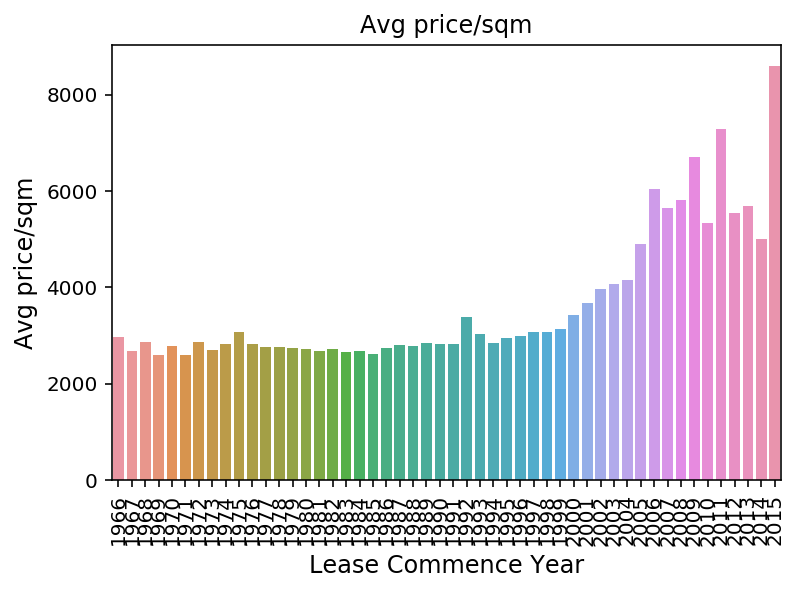

In [34]:
#lease commencement year
count_lease_commence = data['lease_commence_date'].nunique()
print("Total Lease Commence Count:", count_lease_commence)
#lease_commence_count = data['lease_commence_date'].value_counts()
#print("Lease Commence Count \n" +str(lease_commence_count))

lease_commence = np.unique(data['lease_commence_date'])

sns.countplot(x="lease_commence_date", data=data , order = lease_commence)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Lease Commence Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Lease Commence Year", fontsize=12)
plt.show()

#town vs avg price/sqm
n = len(lease_commence)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][data['lease_commence_date'] == lease_commence[i]].sum()
        sqmm = data['floor_area_sqm'][data['lease_commence_date'] == lease_commence[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
sns.barplot(lease_commence,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Lease Commence Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Observations:
- The years 1984-1990 have the most commencement dates. Before, there is an ongoing increase and after an ongoing decrease.
- Prices/sqm remain relatively flat for commencement dates from 1966 to 2000 and increase from 2000 to 2012. After 2012 the prices decrease heavily and in 2015, it almost doubled again. <br>


#### 2.2.3 Feature: Town

Total Town Count: 27


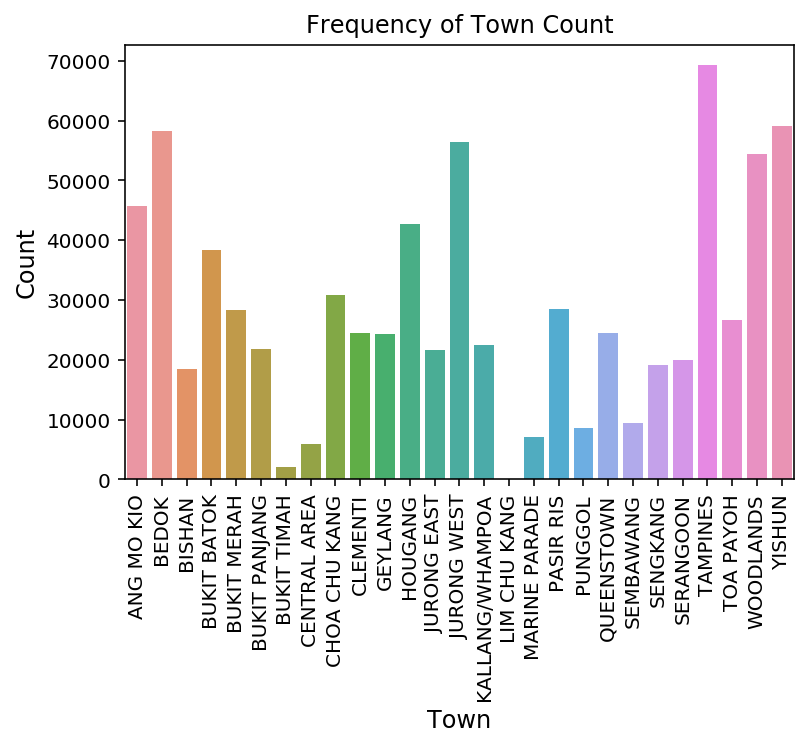

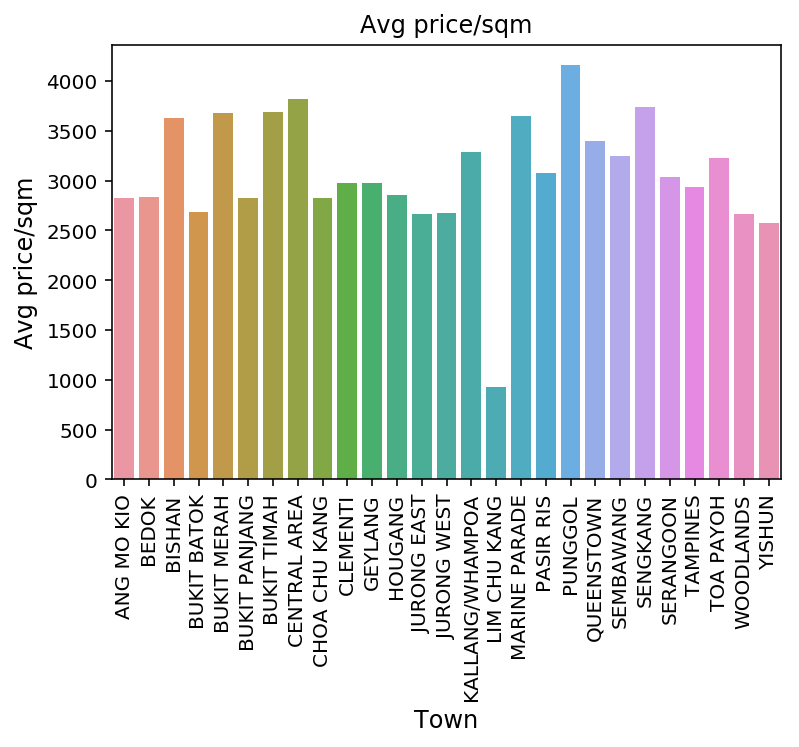

In [6]:
#town count
count_towns = data['town'].nunique()
print("Total Town Count:", count_towns)
#towns_count = data['town'].value_counts()
#print("Town Count \n" +str(towns_count))

town = np.unique(data['town'])

sns.countplot(x="town", data=data , order = town)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Town', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Town Count", fontsize=12)
plt.show()

#town vs avg price/sqm
n = len(town)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][data['town'] == town[i]].sum()
        sqmm = data['floor_area_sqm'][data['town'] == town[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
sns.barplot(town,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Town', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Observations:
- Besides Bukit Timah and Lim Chu Kang, all towns have more than 5000 sales occurrences.
- TAMPINES is the most present town, with 69236 sales.
- Lim Chu Kang is a clear outlier in terms of price/sqm. This is probably correlated to the low number of only 64 sales registered in that area.
- The most expensive town is Punggol. 

### Singaporean Townships and Areas
The Housing and Development Board makes a distinction between a total of 23 townships, located in 5 different areas [12]. The areas define their location within the city-state, whereas the township concatenates a community with its own council. The map below highlights the areas and townships. The areas are respectively: north (red), nort-east (yellow), east (blue), central (brown) and west (green). The pins indicate the townships included.

In [9]:
IFrame('https://www.google.com/maps/d/u/0/embed?mid=1Gv4-kVYanSXMj8Q2ldJKJkzTilOlEZxL', width=800, height=300)

#### 2.2.4 Feature: Flat Type

Total Flat Type Count: 8


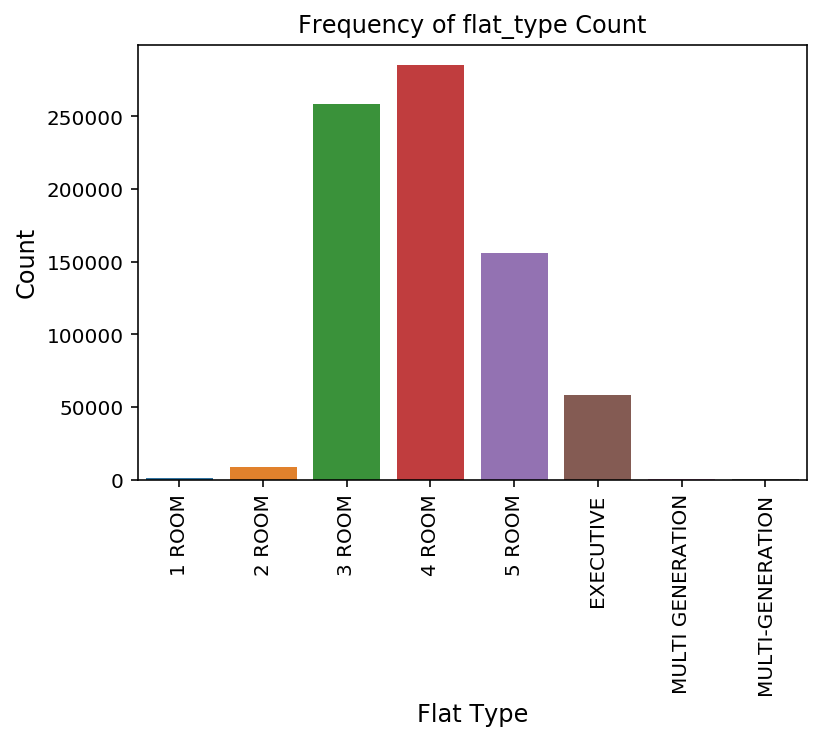

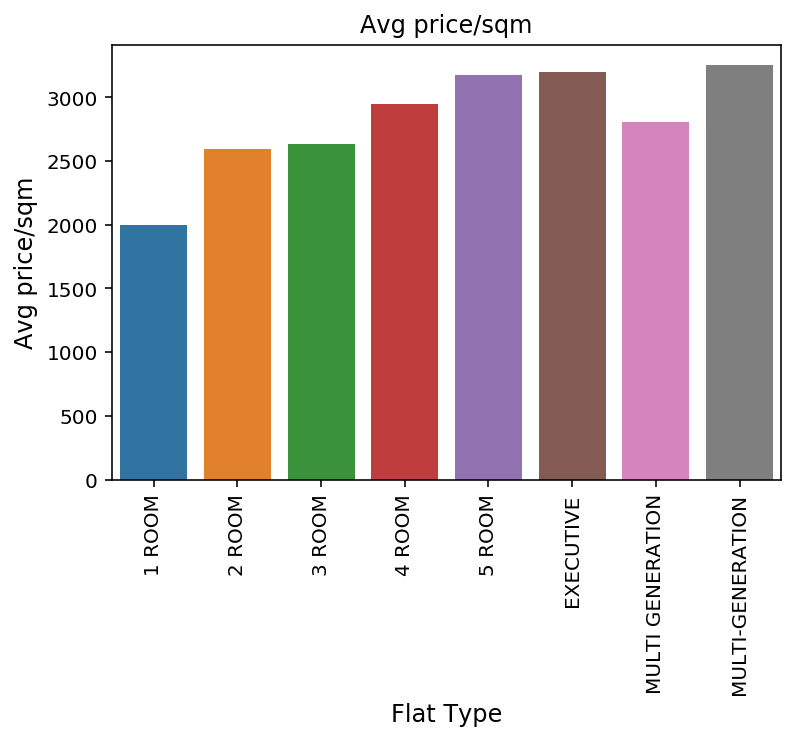

In [24]:
#flat_type count
count_flat_type = data['flat_type'].nunique()
print("Total Flat Type Count:", count_flat_type)
#flat_type_count = data['flat_type'].value_counts()
#print("Flat Type Count \n" +str(flat_type_count))

flat_type = np.unique(data['flat_type'])

sns.countplot(x="flat_type", data=data , order = flat_type)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Flat Type', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of flat_type Count", fontsize=12)
plt.show()

#flat type vs avg price/sqm
n = len(flat_type)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][data['flat_type'] == flat_type[i]].sum()
        sqmm = data['floor_area_sqm'][data['flat_type'] == flat_type[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
sns.barplot(flat_type,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Flat Type', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Observations:
- 1 Room, 2 Room, and Multi-Generations are clearly fewer than the remaining flat types.
- The most common flat type is 4 rooms.
- Prices per sqm, surprisingly, seem to up with flat size. <br>

#### 2.2.5 Feature: Flat Model

Total Flat Model Count: 34


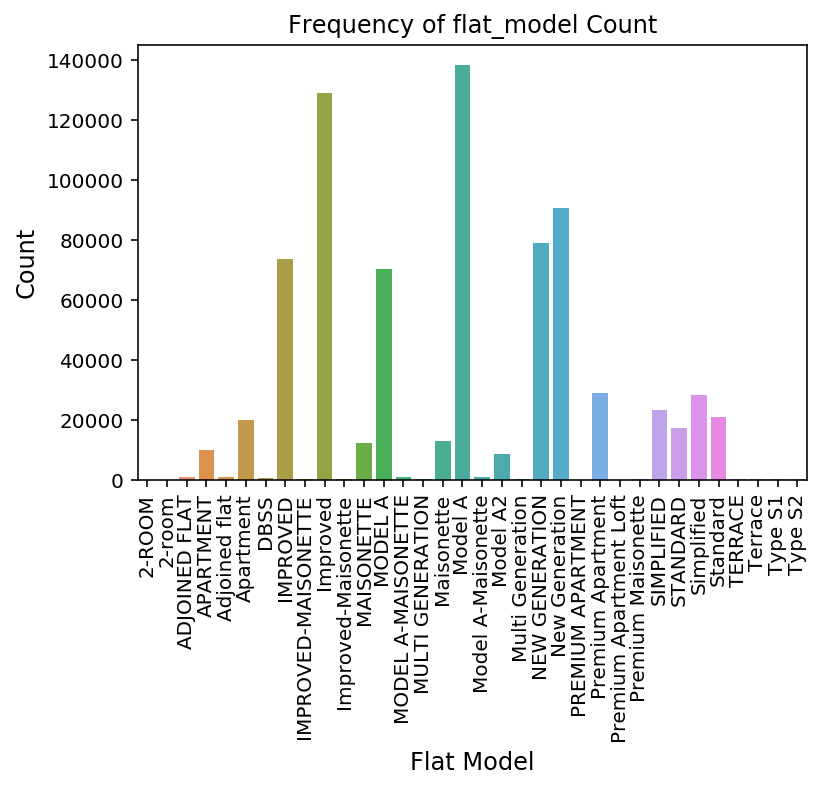

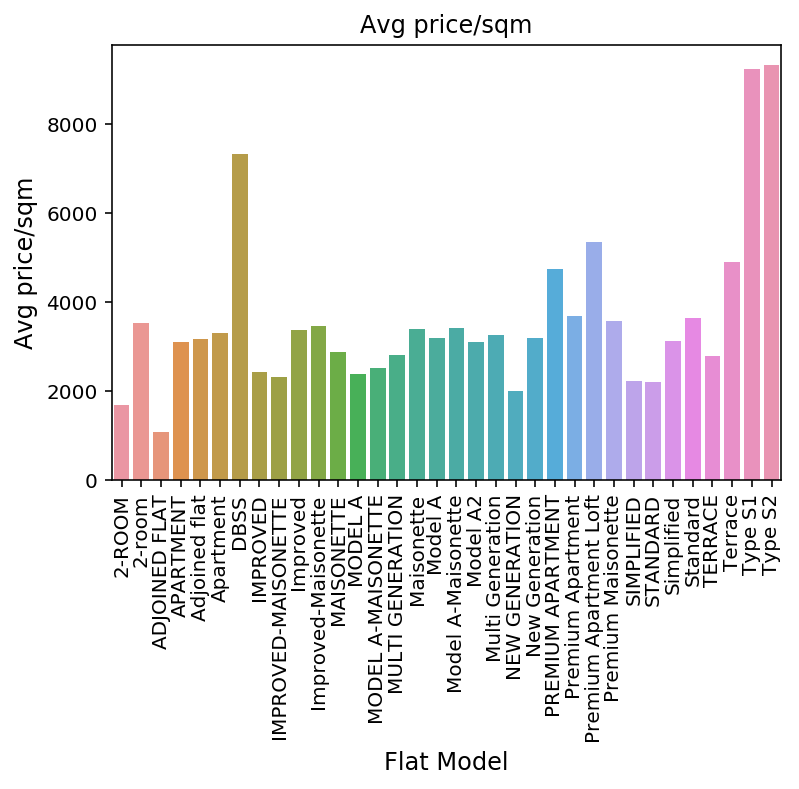

In [30]:
#flat_model count
count_flat_model = data['flat_model'].nunique()
print("Total Flat Model Count:", count_flat_model)
#flat_model_count = data['flat_model'].value_counts()
#print("Flat Model Count \n" +str(flat_model_count))

flat_model = np.unique(data['flat_model'])

sns.countplot(x="flat_model", data=data , order = flat_model)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Flat Model', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of flat_model Count", fontsize=12)
plt.show()

#flat model vs avg price/sqm
n = len(flat_model)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][data['flat_model'] == flat_model[i]].sum()
        sqmm = data['floor_area_sqm'][data['flat_model'] == flat_model[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
sns.barplot(flat_model,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Flat Model', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Obersvations:
- Concerning flat_models, there are lot of flat_models that exist less than a 1000 times.
- The most common ones are 'Model A' and 'Improved'.
- Prices/sqm vary widely, which is probably due to some sample sizes being very small. <br>

#### 2.2.6 Feature: Storey Range

Total Storey Range Count: 25
Storey Range Count 
04 TO 06    196169
07 TO 09    177012
01 TO 03    158446
10 TO 12    149470
13 TO 15     46780
16 TO 18     16906
19 TO 21      8337
22 TO 24      5233
01 TO 05      2700
06 TO 10      2474
25 TO 27      2100
11 TO 15      1259
28 TO 30       788
16 TO 20       265
31 TO 33       151
34 TO 36       151
37 TO 39       148
21 TO 25        92
40 TO 42        73
26 TO 30        39
43 TO 45        11
46 TO 48        11
36 TO 40         7
49 TO 51         5
31 TO 35         2
Name: storey_range, dtype: int64


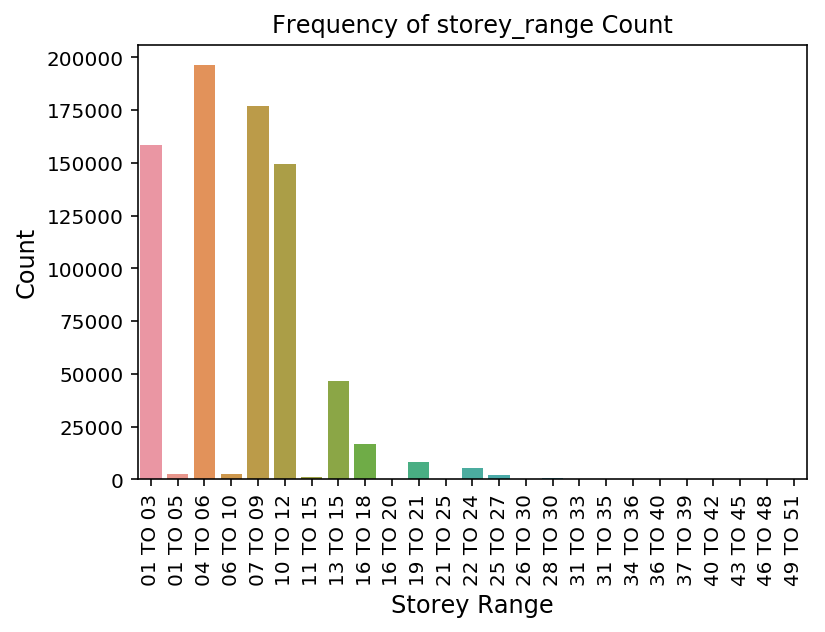

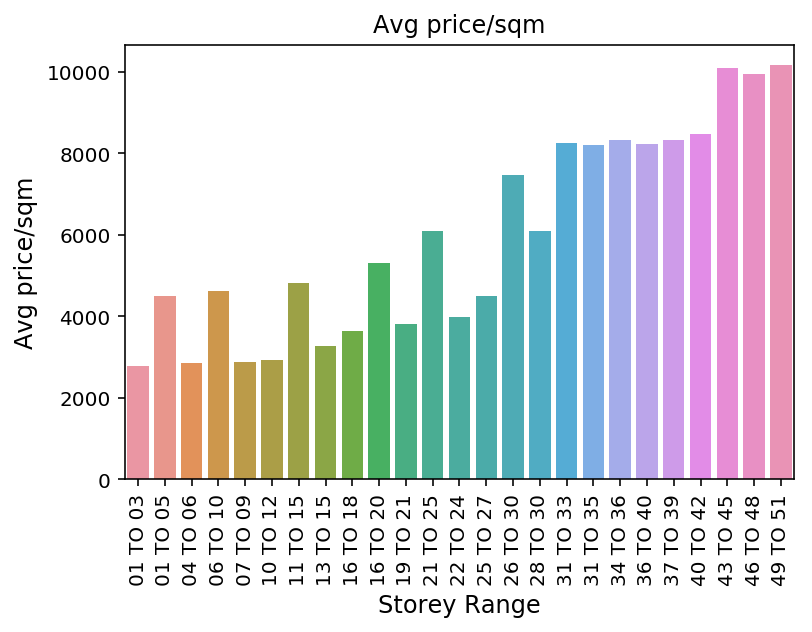

In [91]:
#storey range count
count_storey_range = data['storey_range'].nunique()
print("Total Storey Range Count:", count_storey_range)
storey_range_count = data['storey_range'].value_counts()
print("Storey Range Count \n" +str(storey_range_count))

storey_array = np.unique(data['storey_range'])

sns.countplot(x="storey_range", data=data , order = storey_array)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Storey Range', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of storey_range Count", fontsize=12)
plt.show()

#storey range vs avg price/sqm
n = len(storey_array)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][data['storey_range'] == storey_array[i]].sum()
        sqmm = data['floor_area_sqm'][data['storey_range'] == storey_array[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
sns.barplot(storey_array,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Storey Range', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Observations:
- There is a clear upwards trend in prices for higher stories.
- There are few storey ranges that spike in price.
- Those ranges also tend to have really low frequency.
- These ranges also tend to be included in other ranges.
- It is possible that e.g. in recent years, which have higher prices, the storey format changed; which would explain higher avg. prices per sqm. <br>

#### 2.2.7 Feature: Squared Meters Distribution

Total SQM Range Count: 209


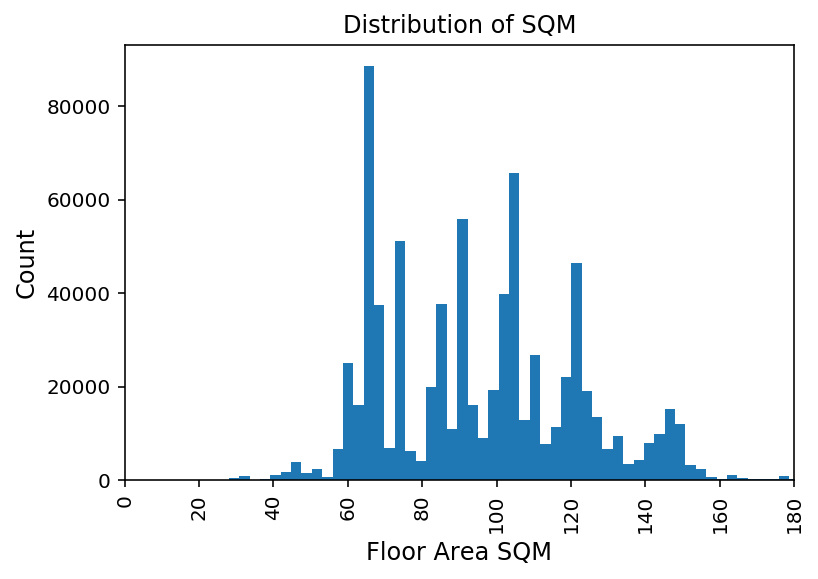

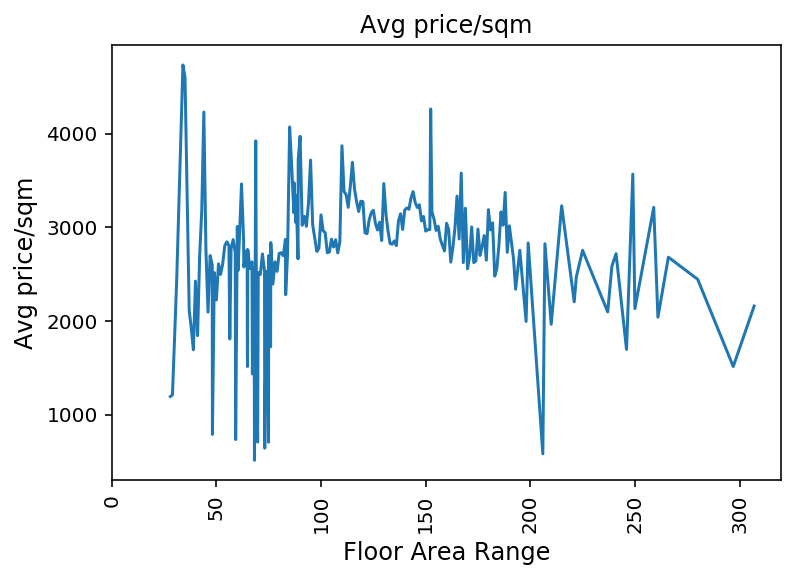

In [47]:
#SQM distribution
count_sqm = data['floor_area_sqm'].nunique()
print("Total SQM Range Count:", count_sqm)
#sqm_count = data['floor_area_sqm'].value_counts()
#print("SQM Range Count \n" +str(sqm_count))

sqm_area = np.unique(data['floor_area_sqm'])

plt.hist(data['floor_area_sqm'], bins = 100)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Floor Area SQM', fontsize=12)
plt.xlim(0,180)
plt.xticks(rotation='vertical')
plt.title("Distribution of SQM", fontsize=12)
plt.show()

#storey range vs avg price/sqm
n = len(sqm_area)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][data['floor_area_sqm'] == sqm_area[i]].sum()
        sqmm = data['floor_area_sqm'][data['floor_area_sqm'] == sqm_area[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
plt.plot(sqm_area,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Floor Area Range', fontsize=12)
plt.xlim(0,320)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Observations:
- We can see that the largest chunk of the HBDs are between 25 and 200 sqm.
- There are strong variations of counts between the different bins.
- Prices per sqm seem to be highest in the mid-range of SQM. <br>

#### 2.2.8 Feature: Resale Price

Total Resale Price Range Count: 8082


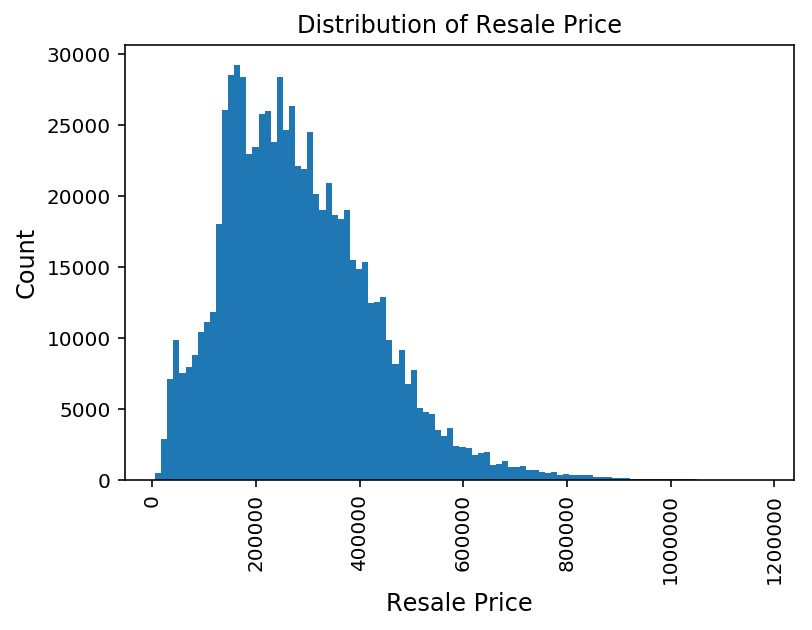

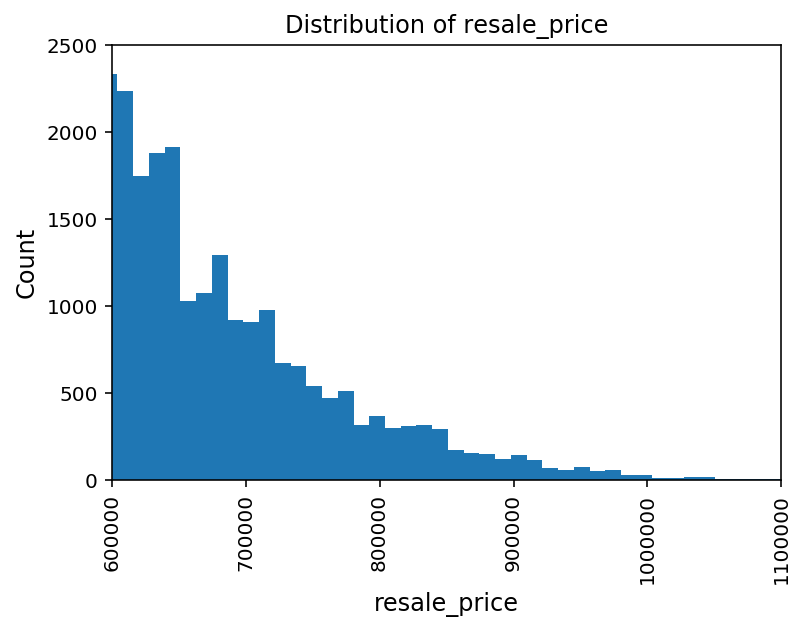

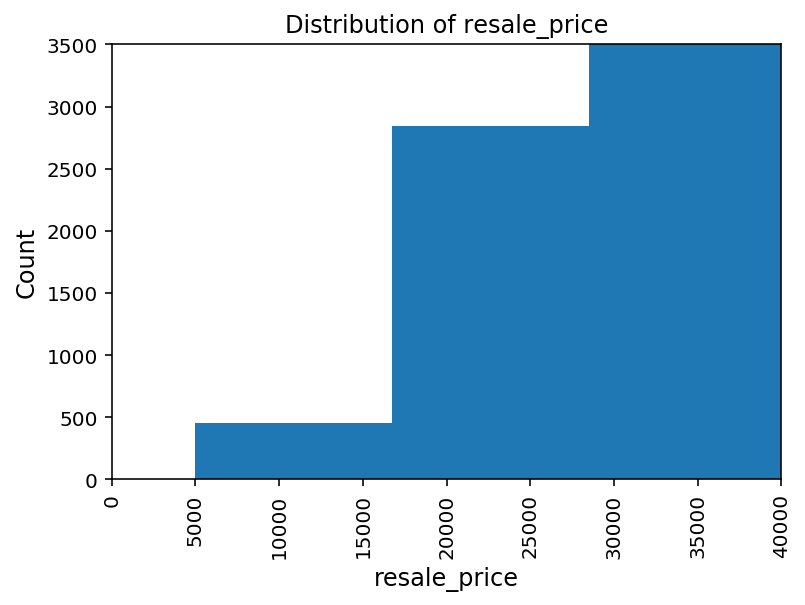

In [65]:
#resale price distribution
count_price = data['resale_price'].nunique()
print("Total Resale Price Range Count:", count_price)
#price_count = data['resale_price'].value_counts()
#print("Resale Price Range Count \n" +str(price_count))

plt.hist(data['resale_price'], bins = 100)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Resale Price', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Distribution of Resale Price", fontsize=12)
plt.show()

#resale prices above $1,000,000
plt.hist(data['resale_price'], bins=100)
plt.ylabel('Count', fontsize=12)
plt.xlabel('resale_price', fontsize=12)
plt.xticks(rotation='vertical')
plt.ylim(0,2500)
plt.xlim(600000,1100000)
plt.title("Distribution of resale_price", fontsize=12)
plt.show()

#resale prices under $10,000
plt.hist(data['resale_price'], bins=100)
plt.ylabel('Count', fontsize=12)
plt.xlabel('resale_price', fontsize=12)
plt.xticks(rotation='vertical')
plt.ylim(0,3500)
plt.xlim(0,40000)
plt.title("Distribution of resale_price", fontsize=12)
plt.show()

Observations:
- Practically no prices per flat go above 1,000,000 SGD.
- The majority of prices are between 150,000 and 400,000 SGD.
- There seems to be a number of flats (400+) that were sold for less than 10,000 SGD. <br>

## 3 Cleaning and Preprocessing the Dataset
<hr>
After exploring the dataset, we came across the following points for preprocessing the data: 
- The feature month consists of sales year and month, e.g. 1990-01. To include the variable in the model, this variable will be seperated to a variable called sales year and a variable called month. 
- However, a linear regression will not be able to read the years, since it can see it as another numerical value. Therefore, the remaining lease year is calculated. Once the sales year variable is created, the remaining lease year can be computed by using the following formula: $remaining lease year = 99 - (sales year - lease commence date)$.
- Furthermore, there are rows containing characters. These rows (town, flat type, flat model and storey range) are transformed into dummy variables to clarify their levels, with other words, to quantify the qualitative data. <br>

### 3.1 Data Cleaning
During the exploration, there are some cleaning that should be performed. First, the flat types consist of eight types, which should be seven types instead. The flat type "Multi Generation" has a unique value with a space in between and one with a hyphen. Second, the flat models consist of 32 models, which should be 21 instead. This is also because of the capital usage. These doubles are removed by cleaning the data.


In [5]:
pd.options.mode.chained_assignment = None #SettingWithCopyWarning for confusing chained assignment disabled

#remove doubles
data['flat_type'][data['flat_type'] == 'MULTI-GENERATION'] = 'MULTI GENERATION'

#flat_type count
count_flat_type = data['flat_type'].nunique()
print("Total Flat Type Count:", count_flat_type)
flat_type_count = data['flat_type'].value_counts()
print("Flat Type \n" +str(flat_type_count))

Total Flat Type Count: 7
Flat Type 
4 ROOM              285136
3 ROOM              258482
5 ROOM              156260
EXECUTIVE            58177
2 ROOM                8859
1 ROOM                1246
MULTI GENERATION       469
Name: flat_type, dtype: int64


In [6]:
#remove doubles
data['flat_model'][data['flat_model'] == 'MODEL A'] = 'Model A'
data['flat_model'][data['flat_model'] == 'IMPROVED'] = 'Improved'
data['flat_model'][data['flat_model'] == 'NEW GENERATION'] = 'New Generation'
data['flat_model'][data['flat_model'] == 'PREMIUM APARTMENT'] = 'Premium Apartment'
data['flat_model'][data['flat_model'] == 'SIMPLIFIED'] = 'Simplified'
data['flat_model'][data['flat_model'] == 'STANDARD'] = 'Standard'
data['flat_model'][data['flat_model'] == 'APARTMENT'] = 'Apertment'
data['flat_model'][data['flat_model'] == 'MAISONETTE'] = 'Maisonette'
data['flat_model'][data['flat_model'] == 'ADJOINED FLAT'] = 'Adjoined flat'
data['flat_model'][data['flat_model'] == 'MODEL A-MAISONETTE'] = 'Model A-Maisonette'
data['flat_model'][data['flat_model'] == 'TERRACE'] = 'Terrace'
data['flat_model'][data['flat_model'] == 'MULTI GENERATION'] = 'Multi Generation'
data['flat_model'][data['flat_model'] == 'IMPROVED-MAISONETTE'] = 'Improved-Maisonette'
data['flat_model'][data['flat_model'] == '2-ROOM'] = '2-room'

#flat_model count
count_flat_model = data['flat_model'].nunique()
print("Total Flat Model Count:", count_flat_model)
flat_model_count = data['flat_model'].value_counts()
print("Flat Model Count \n" +str(flat_model_count))

Total Flat Model Count: 21
Flat Model Count 
Model A                   208633
Improved                  202602
New Generation            169643
Simplified                 51604
Standard                   38234
Premium Apartment          28886
Maisonette                 25136
Apartment                  19745
Apertment                   9901
Model A2                    8382
Adjoined flat               1913
Model A-Maisonette          1784
Terrace                      609
DBSS                         601
Multi Generation             469
Type S1                      183
Improved-Maisonette          105
Type S2                       80
Premium Maisonette            75
2-room                        38
Premium Apartment Loft         6
Name: flat_model, dtype: int64


### 3.2 Feature Engineering
In this part, we will explore new features that we can add to make our data more valuable. Since the data consists of seven objects, two floats and one integer, the seven objects will be researched and to see which can and will be changed. (Note that adding and dropping variables have been changed to comments, because an error would pop up otherwise. This is because the variable is already added or dropped, thus it cannot be performed again.)

In [7]:
#add sales year variable
data.insert(1,'sales_year',(pd.DatetimeIndex(data['month']).year))

#add month2 variable
data.insert(1,'month2',(pd.DatetimeIndex(data['month']).month))

#remove month variable
data = data.drop('month',1)

#rename month2 variable
data = data.rename(columns = {'month2':'month'})

#compute remaining lease variable
data['remaining_lease'] = 99 - (data.sales_year - data.lease_commence_date)

Another interesting feature would be the longtitude and latitude of the street name. Fortunately, Google has such a package to make this possible. Unfortunately, this is only possible for 2,500 data points per day. Since we have 768.629 data points, this task was not possible for us. However, we still want to show you that we have tried running the code underneath. 

In [10]:
#compute longlat variable
data['long_lat'] = geocoder.google(data['street_name']).lating

Status code Unknown from https://maps.googleapis.com/maps/api/geocode/json: ERROR - ('Connection aborted.', OSError("(32, 'EPIPE')",))


In [25]:
data.tail(5)

month  sales_year    town  flat_type block     street_name  \
58626      1        2018  YISHUN     5 ROOM   760    YISHUN ST 72   
58627      1        2018  YISHUN     5 ROOM   876    YISHUN ST 81   
58628      1        2018  YISHUN  EXECUTIVE   792  YISHUN RING RD   
58629      1        2018  YISHUN  EXECUTIVE   387  YISHUN RING RD   
58630      1        2018  YISHUN  EXECUTIVE   277    YISHUN ST 22   

      storey_range  floor_area_sqm  flat_model  lease_commence_date  \
58626     07 TO 09           122.0    Improved                 1987   
58627     04 TO 06           121.0    Improved                 1987   
58628     07 TO 09           146.0  Maisonette                 1987   
58629     04 TO 06           146.0  Maisonette                 1988   
58630     07 TO 09           146.0  Maisonette                 1985   

       resale_price  remaining_lease  
58626      490000.0               68  
58627      468000.0               68  
58628      555000.0               68  
58629      550000.0               69  
58630      545000.0               66

In [107]:
#add area variable
data.insert(1,'area',(data['town']))

In [109]:
#dummies for areas
data['area'][data.area == 'BUKIT MERAH'] = 'CENTRAL'
data['area'][data.area == 'TOA PAYOH'] = 'CENTRAL'
data['area'][data.area == 'QUEENSTOWN'] = 'CENTRAL'
data['area'][data.area == 'GEYLANG'] = 'CENTRAL'
data['area'][data.area == 'KALLANG/WHAMPOA'] = 'CENTRAL'
data['area'][data.area == 'BISHAN'] = 'CENTRAL'
data['area'][data.area == 'MARINE PARADE'] = 'CENTRAL'
data['area'][data.area == 'CENTRAL AREA'] = 'CENTRAL'
data['area'][data.area == 'BUKIT TIMAH'] = 'CENTRAL'
data['area'][data.area == 'TAMPINES'] = 'NORTH'
data['area'][data.area == 'YISHUN'] = 'NORTH'
data['area'][data.area == 'BEDOK'] = 'NORTH'
data['area'][data.area == 'PASIR RIS'] = 'NORTH'
data['area'][data.area == 'JURONG WEST'] = 'WEST'
data['area'][data.area == 'BUKIT BATOK'] = 'WEST'
data['area'][data.area == 'CHOA CHU KANG'] = 'WEST'
data['area'][data.area == 'CLEMENTI'] = 'WEST'
data['area'][data.area == 'JURONG EAST'] = 'WEST'
data['area'][data.area == 'BUKIT PANJANG'] = 'WEST'
data['area'][data.area == 'WOODLANDS'] = 'EAST'
data['area'][data.area == 'SEMBAWANG'] = 'EAST'
data['area'][data.area == 'LIM CHU KANG'] = 'EAST'
data['area'][data.area == 'ANG MO KIO'] = 'NORTH EAST'
data['area'][data.area == 'HOUGANG'] = 'NORTH EAST'
data['area'][data.area == 'SERANGOON'] = 'NORTH EAST'
data['area'][data.area == 'SENGKANG'] = 'NORTH EAST'
data['area'][data.area == 'PUNGGOL'] = 'NORTH EAST'

area_count = data['area'].value_counts()
print("Area \n" +str(area_count))

#source: http://www.hdb.gov.sg/cs/infoweb/about-us/history/hdb-towns-your-home

Area 
NORTH         215084
WEST          193490
CENTRAL       160121
NORTH EAST    136074
EAST           63860
Name: area, dtype: int64


### 3.3 Create dummy variables
To use the string variables in the linear regression, dummies are made for the following features: town/area, flat type, flat model and storey range.

In [110]:
#dummies for flat types
dummies = pd.get_dummies(data['flat_type']).rename(columns=lambda x: 'flat_type_' + str(x))
data = pd.concat([data, dummies], axis=1)

In [32]:
#dummies for flat types
#data['flat_type'][data.flat_type == '1 ROOM'] = 1
#data['flat_type'][data.flat_type == '2 ROOM'] = 2
#data['flat_type'][data.flat_type == '3 ROOM'] = 3
#data['flat_type'][data.flat_type == '4 ROOM'] = 4
#data['flat_type'][data.flat_type == '5 ROOM'] = 5
#data['flat_type'][data.flat_type == 'MULTI GENERATION'] = 6
#data['flat_type'][data.flat_type == 'EXECUTIVE'] = 7

#flat_type_count = data['flat_type'].value_counts()
#print("Flat Type \n" +str(flat_type_count))

#source: http://www.hdb.gov.sg/cs/infoweb/residential/buying-a-flat/new/types-of-flats&rendermode=preview

Flat Type 
4    285136
3    258482
5    156260
7     58177
2      8859
1      1246
6       469
Name: flat_type, dtype: int64


In [116]:
#dummies for flat models
dummies = pd.get_dummies(data['flat_model']).rename(columns=lambda x: 'flat_model_' + str(x))
data = pd.concat([data, dummies], axis=1)

#flat_model_array = np.unique(data['flat_model'])
#n = len(flat_model_array)

#for i in range(0,n):
#    data['flat_model'][data['flat_model'] == flat_model_array[i]] = i+1

#count_flat_model = data['flat_model'].nunique()
#print("Total Flat Model Count:", count_flat_model)
#flat_model_count = data['flat_model'].value_counts()
#print("Flat Model Count \n" +str(flat_model_count))

In [117]:
data.head(5)

month        area  sales_year        town flat_type block  \
0      1  NORTH EAST        1990  ANG MO KIO    1 ROOM   309   
1      1  NORTH EAST        1990  ANG MO KIO    1 ROOM   309   
2      1  NORTH EAST        1990  ANG MO KIO    1 ROOM   309   
3      1  NORTH EAST        1990  ANG MO KIO    1 ROOM   309   
4      1  NORTH EAST        1990  ANG MO KIO    3 ROOM   216   

        street_name storey_range  floor_area_sqm      flat_model  \
0  ANG MO KIO AVE 1     10 TO 12            31.0        Improved   
1  ANG MO KIO AVE 1     04 TO 06            31.0        Improved   
2  ANG MO KIO AVE 1     10 TO 12            31.0        Improved   
3  ANG MO KIO AVE 1     07 TO 09            31.0        Improved   
4  ANG MO KIO AVE 1     04 TO 06            73.0  New Generation   

          ...          flat_model_Multi Generation  flat_model_New Generation  \
0         ...                                    0                          0   
1         ...                                    0                          0   
2         ...                                    0                          0   
3         ...                                    0                          0   
4         ...                                    0                          1   

   flat_model_Premium Apartment  flat_model_Premium Apartment Loft  \
0                             0                                  0   
1                             0                                  0   
2                             0                                  0   
3                             0                                  0   
4                             0                                  0   

   flat_model_Premium Maisonette  flat_model_Simplified  flat_model_Standard  \
0                              0                      0                    0   
1                              0                      0                    0   
2                              0                      0                    0   
3                              0                      0                    0   
4                              0                      0                    0   

   flat_model_Terrace  flat_model_Type S1  flat_model_Type S2  
0                   0                   0                   0  
1                   0                   0                   0  
2                   0                   0                   0  
3                   0                   0                   0  
4                   0                   0                   0  

[5 rows x 41 columns]

In [34]:
#dummies for storey ranges
storey_range_array = np.unique(data['storey_range'])
n = len(storey_range_array)

for i in range(0,n):
    data['storey_range'][data['storey_range'] == storey_range_array[i]] = i+1

#data['storey_range'][data.flat_type == '01 TO 03'] = 1
#data['storey_range'][data.flat_type == '01 TO 03'] = 2
#data['storey_range'][data.flat_type == '01 TO 03'] = 3

count_storey_range = data['storey_range'].nunique()
print("Total Storey Range Count:", count_storey_range)
storey_range_count = data['storey_range'].value_counts()
print("Storey Range Count \n" +str(storey_range_count))

Total Storey Range Count: 25
Storey Range Count 
3     196169
5     177012
1     158446
6     149470
8      46780
9      16906
11      8337
13      5233
2       2700
4       2474
14      2100
7       1259
16       788
10       265
17       151
19       151
21       148
12        92
22        73
15        39
24        11
23        11
20         7
25         5
18         2
Name: storey_range, dtype: int64


In [36]:
#dummies for town
town_array = np.unique(data['town'])
n = len(town_array)

for i in range(0,n):
    data['town'][data['town'] == town_array[i]] = i+1

count_town = data['town'].nunique()
print("Total Town Count:", count_town)
town_count = data['town'].value_counts()
print("Town Count \n" +str(town_count))

Total Town Count: 27
Town Count 
24    69236
27    59020
2     58330
14    56447
26    54334
1     45736
12    42658
4     38291
9     30913
18    28498
5     28376
25    26724
20    24508
10    24504
11    24400
15    22563
6     21765
13    21570
23    19989
22    19095
3     18447
21     9462
19     8596
17     7070
8      5906
7      2127
16       64
Name: town, dtype: int64


In [62]:
data.tail(10)

month area  sales_year town flat_type block     street_name  \
58621      1    2        2018   27         5   159    YISHUN ST 11   
58622      1    2        2018   27         5   298    YISHUN ST 20   
58623      1    2        2018   27         5   229    YISHUN ST 21   
58624      1    2        2018   27         5   212    YISHUN ST 21   
58625      1    2        2018   27         5   607    YISHUN ST 61   
58626      1    2        2018   27         5   760    YISHUN ST 72   
58627      1    2        2018   27         5   876    YISHUN ST 81   
58628      1    2        2018   27         7   792  YISHUN RING RD   
58629      1    2        2018   27         7   387  YISHUN RING RD   
58630      1    2        2018   27         7   277    YISHUN ST 22   

      storey_range  floor_area_sqm flat_model  lease_commence_date  \
58621            6           126.0          6                 1985   
58622            8           111.0          6                 2000   
58623            3           121.0          6                 1985   
58624            1           121.0          6                 1985   
58625            5           121.0          6                 1987   
58626            5           122.0          6                 1987   
58627            3           121.0          6                 1987   
58628            5           146.0          8                 1987   
58629            3           146.0          8                 1988   
58630            5           146.0          8                 1985   

       resale_price  remaining_lease  
58621      477000.0               66  
58622      487000.0               81  
58623      410000.0               66  
58624      440000.0               66  
58625      473800.0               68  
58626      490000.0               68  
58627      468000.0               68  
58628      555000.0               68  
58629      550000.0               69  
58630      545000.0               66

To check whether the remaining lease variable is correct, the data tail from dataset 5 in the data acquisition is used to compare with the new data. Since only the fifth data set consists of this data, we could use the column for validation. 

### 3.4 Correlations

Before preprocessing the features, the features should be checked on multicollinearity. According to [source], the prediction model should have features that are independent of each other. If the assumption is violated, collinearity issues could occur. To check this, the Pearson correlation is used to check if any features are highly correlated (< .80) and the variance inflation factors (< 4). 

### 3.5 Variables

The variables considered in the research will be: <br>
$x_1$ Remaining lease year <br>
$x_2$ Floor area squared meters <br>
$D_3$ Town and/or Area <br>
$D_4$ Flat type <br>
$D_5$ Flat model <br>
$D_6$ Storey range <br>
$x_7$ Month <br>
$Y$ Resale price <br>

In [21]:
#remove unnecessary variables
#data = data.drop('town',1)
#data = data.drop('block',1)
#data = data.drop('street_name',1)

## 4 Data Analysis
<hr>
This part of the report will show algorithms that have been applied to predict the housing prices. We have focused on regressions with different features. <br>

### 4.1 Linear Regression
Predictive model with linear regression

In [55]:
data.shape

(768629, 13)

In [71]:
X = data.drop('resale_price', axis = 1)
#X = data[['month','area','sales_year','flat_type','storey_range','floor_area_sqm','flat_model','lease_commence_date','remaining_lease']]

#create LinearRegression object
lr = LinearRegression()
lr.fit(X,data['resale_price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0.5,1,'Prices vs Predicted Prices: $Y_i$ vs $\\hat{Y}_i$')

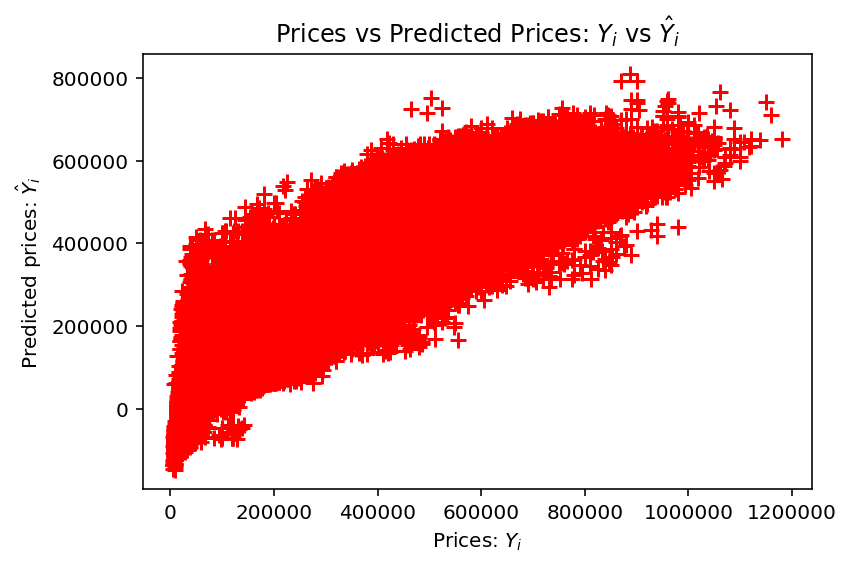

In [20]:
plt.scatter(data['resale_price'], lr.predict(X), s=60, c='r', marker='+')
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")

In [72]:
mseFull = np.mean((data.resale_price - lr.predict(X))**2)
print("MSE FULL: %.2f" % mseFull)

maeFull = np.mean(np.absolute(data.resale_price - lr.predict(X)))
print("MAE FULL: %.2f" % maeFull)


lr.fit(X[['floor_area_sqm']],data['resale_price'])

maeSQM = np.mean(np.absolute(data.resale_price - lr.predict(X[['floor_area_sqm']])))
print("\nMAE SQM: %.2f" % maeSQM)

mseSQM = np.mean(data.resale_price - lr.predict(X[['floor_area_sqm']])**2)
print("MSE SQM: %.2f" % mseSQM)

MSE FULL: 5191017940.39
MAE FULL: 53886.95

MAE SQM: 82229.45
MSE SQM: -88041247229.96


#### Coefficient of Determination
The coefficient of determination, also known as $R^2$, is the proportion variance between the dependent variable and the prediction from the independent variable. This coefficient ranges from 0 to 1, where 1 means that there is no variance between the predicted and actual.

Formula:<br> 
$$R^2 = 1 - \frac{\sum(y - \hat{y})^2}{\sum(y - \bar{y})^2}$$

where $y$ is the actual value, $\hat{y}$ is the predicted value of y, and $\bar{y}$ is the mean value of y.

In [87]:
from sklearn.metrics import r2_score

coefficient_of_determination = r2_score(data.resale_price, lr.predict(X))
print('R-squared: %.4f' % coefficient_of_determination)

R-squared: 0.7444


In [59]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(
    X, data.resale_price, test_size = 0.33, random_state = 5)

print ('Train data set:', X_train.shape)
print ('Test data set:', X_test.shape)
#print (Y_train.shape)
#print (Y_test.shape)

Train data set: (514981, 9)
Test data set: (253648, 9)


In [82]:
lr.fit(X_train, Y_train)
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

print('The linear regression shows the following:\n')
print('With X_train calculate MAE with Y_train: %.2f' % np.mean(np.absolute(Y_train - lr.predict(X_train))))
print('With X_train calculate MAE with X_test, Y_test: %.2f' % np.mean(np.absolute(Y_test - lr.predict(X_test))))

print('\nWith X_train calculate MSE with Y_train: %.2f' % np.mean(Y_train - lr.predict(X_train)**2))
print('With X_train calculate MSE with X_test, Y_test: %.2f' % np.mean(Y_test - lr.predict(X_test)**2))

print('\nVariance score train data: %.4f' % lr.score(X_train, Y_train))
print('Variance score test data: %.4f' % lr.score(X_test, Y_test))

The linear regression shows the following:

With X_train calculate MAE with Y_train: 53816.94
With X_train calculate MAE with X_test, Y_test: 53990.32

With X_train calculate MSE with Y_train: -94758152736.28
With X_train calculate MSE with X_test, Y_test: -94722771798.64

Variance score train data: 0.7444
Variance score test data: 0.7445


### 4.2 Error Analysis 
To perform the error analysis, the accuracy are considered to 

### 4.3 Cross Validation
To check whether the data is overfitting 

https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

## 5 Results
<hr>
Based on the analysis, the following results are derived:

## 6 Conclusion
<hr>
From this research, we can conclude

## Citations 
<hr>
[1] Retrieved from the Internet: <br />
[2] Jiang, L., Phillips, P., & Yu, J. (2014). A new hedonic regression for real estate prices applied to the Singapore residential market. <br />
[3] Retrieved from the Internet: https://www.gov.sg/factually/content/do-hdb-flat-buyers-own-their-flat <br />
[4] Tay D. P. H. and D. K. H. Ho, 1991, “Artificial Intelligence and The Mass Appraisal of
Residential Apartments”, Journal of Property Valuation & Investment, 10(2): 525 – 539. <br />
[5] Do A. Q. and G. Grudnitski, 1992, “A Neural Network Approach to Residential Property
Appraisal”, The Real Estate Appraiser, 58(3): 38 – 45. <br />
[6] McCluskey W., 1996, “Predictive Accuracy of Machine Learning Models for The Mass
Appraisal of Residential Property”, New Zealand Valuers’ Journal, July: 41 – 47. <br />
[7] Worzala E., M. Lenk and A.Silva, 1995, “An Exploration of Neural Networks and Its
Application to Real Estate Valuation”, The Journal of Real Estate Research, 10(2): 185 –
201 <br />
[8] Limsombunchai, V. (2004, June). House price prediction: hedonic price model vs. artificial neural network. In New Zealand Agricultural and Resource Economics Society Conference (pp. 25-26). <br />
[9] Wu, L., & Brynjolfsson, E. (2015). The future of prediction: How Google searches foreshadow housing prices and sales. In Economic analysis of the digital economy (pp. 89-118). University of Chicago Press.<br />
[10] Basu, S., & Thibodeau, T. G. (1998). Analysis of spatial autocorrelation in house prices. The Journal of Real Estate Finance and Economics, 17(1), 61-85. <br />
[11] Tu, Y., Sun, H., & Yu, S. M. (2007). Spatial autocorrelations and urban housing market segmentation. The Journal of Real Estate Finance and Economics, 34(3), 385-406.<br />
[12] From the Internet: http://www.hdb.gov.sg/cs/infoweb/about-us/history/hdb-towns-your-home <br />